In [1]:
# set up the python
import cosima_cookbook as cc
from dask.distributed import Client
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np
import xarray as xr
import cmocean as cm
import cartopy.crs as ccrs
import cmocean as cm
import cartopy.feature as cft
import cftime
import IPython.display
import sys, os, warnings

In [2]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/42751/status,
Dashboard: /proxy/42751/status,Workers: 4
Total threads: 16,Total memory: 44.92 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:38295,Workers: 4
Dashboard: /proxy/42751/status,Total threads: 16
Started: Just now,Total memory: 44.92 GiB
Comm: tcp://10.0.128.147:43425,Total threads: 4
Dashboard: /proxy/42553/status,Memory: 11.23 GiB
Nanny: tcp://127.0.0.1:38161,


In [3]:
# load the MOM6 data 
db='/g/data/ik11/outputs/mom6-panan/panant.db' 
expts = ['panant-v2','panant-01-hycom1','panant-01-zstar']

In [4]:
session = cc.database.create_session()

In [5]:
# time period
start_time = '1995-01-01'
end_time = '2000-01-01'

In [6]:
# get the depth
depth = cc.querying.getvar('panant-01-zstar','deptho',session,n=1)
land_mask = np.squeeze(depth.values)*0
land_mask[np.isnan(land_mask)] = 1
land_mask = np.where(land_mask==1,land_mask,np.nan)

In [7]:
# load MOM6 hmo(x,y,rho,t)
hmo = cc.querying.getvar('panant-01-hycom1','hmo',session,start_time=start_time, end_time=end_time)

In [8]:
hmo

,Array,Chunk
Bytes,49.98 GiB,18.77 MiB
Shape,"(63, 70, 845, 3600)","(1, 20, 240, 1025)"
Count,8085 Tasks,4032 Chunks
Type,float32,numpy.ndarray


In [11]:
# load MOM6 umo()
umo = cc.querying.getvar('panant-01-hycom1','umo',session,start_time=start_time, end_time=end_time)

In [12]:
umo

,Array,Chunk
Bytes,49.99 GiB,18.77 MiB
Shape,"(63, 70, 845, 3601)","(1, 20, 240, 1025)"
Count,8085 Tasks,4032 Chunks
Type,float32,numpy.ndarray


In [13]:
# upper layer 
flux1_upp = umo.sel(rho2_l = slice(0,1037.06)).sel(yh = slice(-90,-50)).sel(time = slice(start_time,end_time)).mean('time').cumsum('yh').sum('rho2_l')/1e9
flux1_upp = flux1_upp.load()

In [14]:
flux2_upp = umo.sel(rho2_l = slice(0,1037.10)).sel(yh = slice(-90,-50)).sel(time = slice(start_time,end_time)).mean('time').cumsum('yh').sum('rho2_l')/1e9
flux2_upp = flux1_upp.load()

In [15]:
flux3_upp = umo.sel(rho2_l = slice(0,1037.15)).sel(yh = slice(-90,-50)).sel(time = slice(start_time,end_time)).mean('time').cumsum('yh').sum('rho2_l')/1e9
flux3_upp = flux3_upp.load()

In [38]:
flux4_upp = umo.sel(rho2_l = slice(0,1037.20)).sel(yh = slice(-90,-50)).sel(time = slice(start_time,end_time)).mean('time').cumsum('yh').sum('rho2_l')/1e9
flux4_upp = flux4_upp.load()

In [17]:
# bottom layer
flux1_bot = umo.sel(rho2_l = slice(1037.06,2000.)).sel(yh = slice(-90,-50)).sel(time = slice(start_time,end_time)).mean('time').cumsum('yh').sum('rho2_l')/1e9
flux1_bot = flux1_bot.load()

In [18]:
flux2_bot = umo.sel(rho2_l = slice(1037.10,2000.)).sel(yh = slice(-90,-50)).sel(time = slice(start_time,end_time)).mean('time').cumsum('yh').sum('rho2_l')/1e9
flux2_bot = flux2_bot.load()

In [19]:
flux3_bot = umo.sel(rho2_l = slice(1037.15,2000.)).sel(yh = slice(-90,-50)).sel(time = slice(start_time,end_time)).mean('time').cumsum('yh').sum('rho2_l')/1e9
flux3_bot = flux3_bot.load()

In [39]:
flux4_bot = umo.sel(rho2_l = slice(1037.20,2000.)).sel(yh = slice(-90,-50)).sel(time = slice(start_time,end_time)).mean('time').cumsum('yh').sum('rho2_l')/1e9
flux4_bot = flux4_bot.load()

In [29]:
# the depth of these layers 
depth1 = hmo.sel(rho2_l = slice(0,1037.06)).sel(yh = slice(-90,-50)).sel(time = slice(start_time,end_time)).cumsum(dim='rho2_l').mean('time').max('rho2_l').load()

In [31]:
depth2 = hmo.sel(rho2_l = slice(0,1037.10)).sel(yh = slice(-90,-50)).sel(time = slice(start_time,end_time)).cumsum(dim='rho2_l').mean('time').max('rho2_l').load()
depth3 = hmo.sel(rho2_l = slice(0,1037.15)).sel(yh = slice(-90,-50)).sel(time = slice(start_time,end_time)).cumsum(dim='rho2_l').mean('time').max('rho2_l').load()
depth4 = hmo.sel(rho2_l = slice(0,1037.20)).sel(yh = slice(-90,-50)).sel(time = slice(start_time,end_time)).cumsum(dim='rho2_l').mean('time').max('rho2_l').load()

In [32]:
depth2

<xarray.DataArray 'hmo' (yh: 666, xh: 3600)>
array([[   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       ...,
       [2925.1182, 2911.8025, 2913.017 , ..., 2936.2776, 2943.4111,
        2939.5725],
       [2934.9475, 2915.669 , 2910.022 , ..., 2960.19  , 2965.0725,
        2954.5635],
       [2954.2947, 2930.0195, 2914.813 , ..., 2983.4248, 2986.1804,
        2975.5376]], dtype=float32)
Coordinates:
  * xh       (xh) float64 -279.9 -279.8 -279.7 -279.6 ... 79.75 79.85 79.95
  * yh       (yh) float64 -81.11 -81.07 -81.02 -80.98 ... -50.16 -50.09 -50.03

Text(0.5, 0, 'Depth (m)')

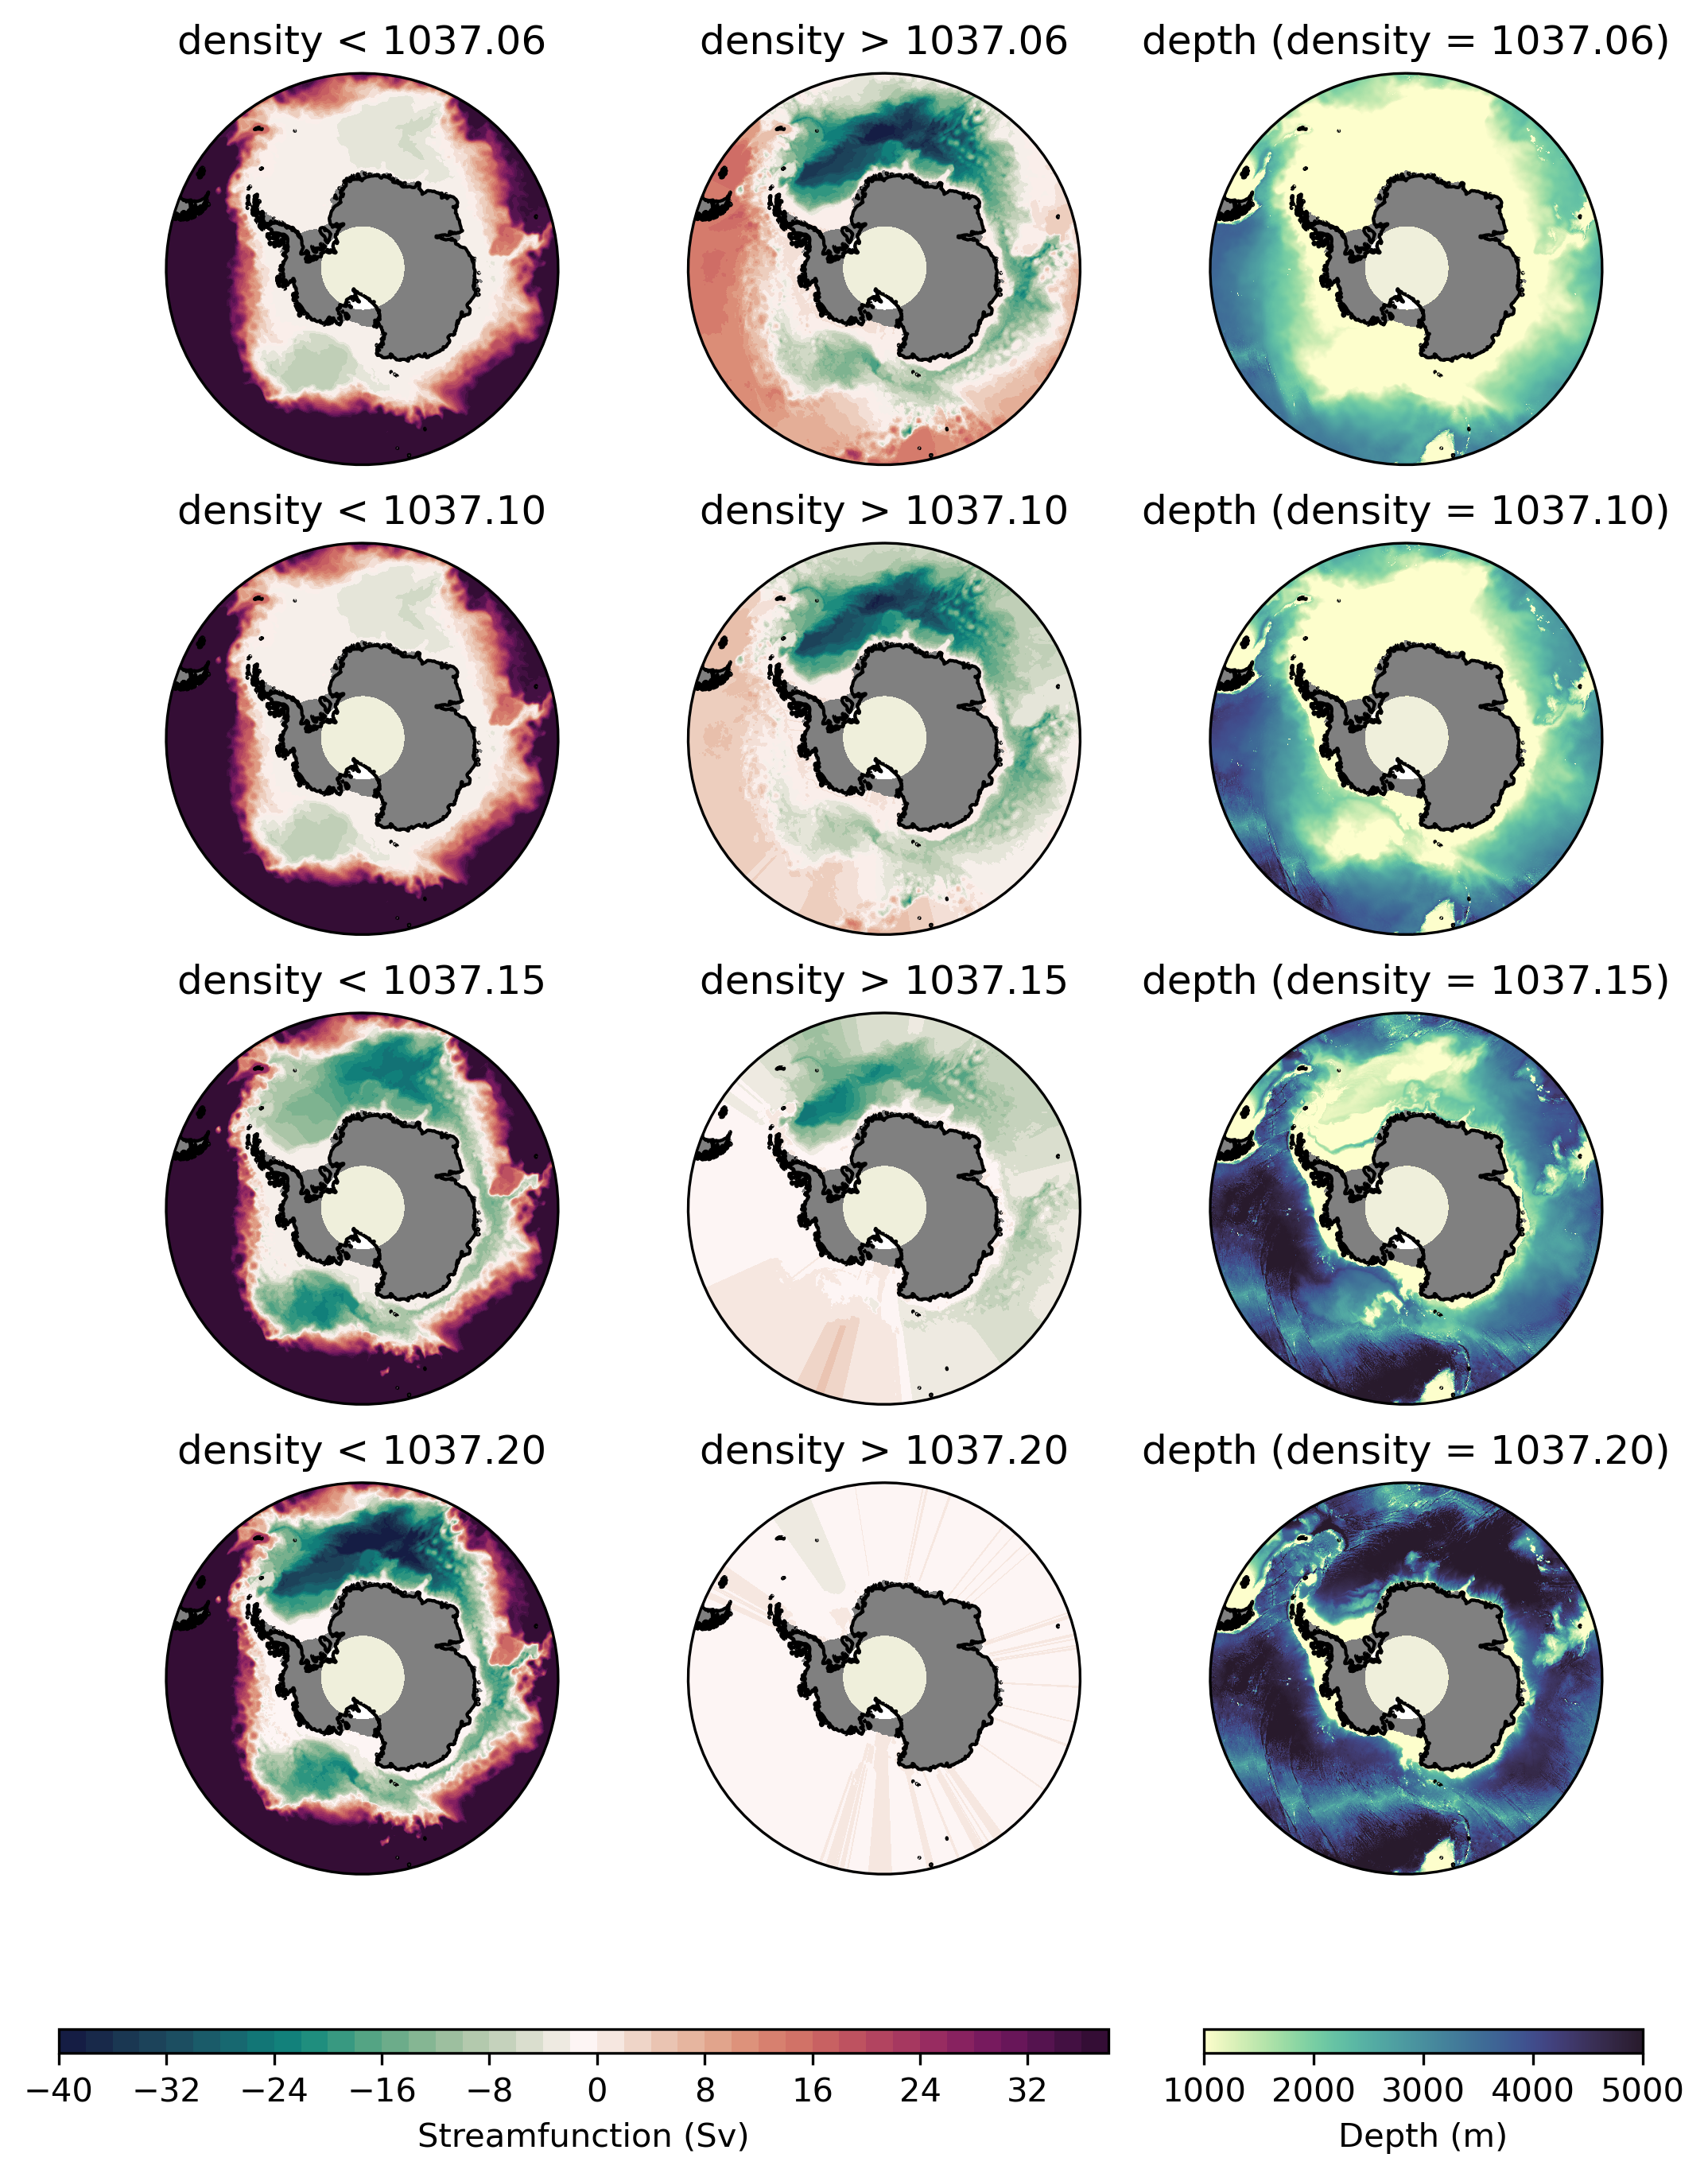

In [41]:
## plot umo and hmo
projection=ccrs.SouthPolarStereo()
fig = plt.figure(figsize=(8, 10), dpi=300)
# flux1_upp
ax = plt.subplot(4,3,1,projection = projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = flux1_upp.plot.contourf(ax=ax, levels = np.arange(-40,40,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.set_title('density < 1037.06')

# flux1_bot
ax = plt.subplot(4,3,2,projection = projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = flux1_bot.plot.contourf(ax=ax, levels = np.arange(-40,40,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.set_title('density > 1037.06')

# depth1
ax = plt.subplot(4,3,3,projection = projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p2 = depth1.plot(vmin = 1000,vmax= 5000,transform=ccrs.PlateCarree(),cmap=cm.cm.deep,add_colorbar=False)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.set_title('depth (density = 1037.06)')

# flux2_upp
ax = plt.subplot(4,3,4,projection = projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = flux2_upp.plot.contourf(ax=ax, levels = np.arange(-40,40,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.set_title('density < 1037.10')

# flux2_bot
ax = plt.subplot(4,3,5,projection = projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = flux2_bot.plot.contourf(ax=ax, levels = np.arange(-40,40,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.set_title('density > 1037.10')

# depth2
ax = plt.subplot(4,3,6,projection = projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = depth2.plot(vmin = 1000, vmax = 5000.,transform=ccrs.PlateCarree(),
                              cmap=cm.cm.deep, add_colorbar = False)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.set_title('depth (density = 1037.10)')

# flux3_upp
ax = plt.subplot(4,3,7,projection = projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = flux3_upp.plot.contourf(ax=ax, levels = np.arange(-40,40,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.set_title('density < 1037.15')

# flux3_bot
ax = plt.subplot(4,3,8,projection = projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = flux3_bot.plot.contourf(ax=ax, levels = np.arange(-40,40,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.set_title('density > 1037.15')

# depth3
ax = plt.subplot(4,3,9,projection = projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = depth3.plot(vmin = 1000, vmax = 5000.,transform=ccrs.PlateCarree(),
                              cmap=cm.cm.deep, add_colorbar = False)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.set_title('depth (density = 1037.15)')

# flux4_upp
ax = plt.subplot(4,3,10,projection = projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = flux4_upp.plot.contourf(ax=ax, levels = np.arange(-40,40,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.set_title('density < 1037.20')

# flux4_bot
ax = plt.subplot(4,3,11,projection = projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = flux4_bot.plot.contourf(ax=ax, levels = np.arange(-40,40,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.set_title('density > 1037.20')

# depth4
ax = plt.subplot(4,3,12,projection = projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p2 = depth4.plot(vmin = 1000, vmax = 5000.,transform=ccrs.PlateCarree(),
                              cmap=cm.cm.deep, add_colorbar = False)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.set_title('depth (density = 1037.20)')

# add the colorbar
ax = plt.axes([0.08, 0.05, 0.55, 0.01])
cb = plt.colorbar(p1, cax=ax, orientation='horizontal',extend='both')
cb.ax.set_xlabel('Streamfunction (Sv)')

ax = plt.axes([0.68, 0.05, 0.23, 0.01])
cb = plt.colorbar(p2, cax=ax, orientation='horizontal',extend='neither')
cb.ax.set_xlabel('Depth (m)')